**Image Classification Question - Wearable Devices**

1.   Import Python libraries (you can add your own)
2.   Mount your Google Drive (don't forget to upload the "*WLD_AI*" directory to the root of your drive - under "*My Drive*")
3.   Read the database and view some of the images
4.   Come up with features to differentiate between <font color='green'>*forest*</font> and <font color='gray'>*glacier*</font> images
5.   Visualize features with a scatter plot
6.   Train your algorithm on the training set and evaluate *accuracy* on the test set
7.   Explain your solution using *text blocks*
8.   BONUS - Repeat 1-7 for <font color='brown'>*mountain*</font> and <font color='gray'>*buildings*</font> images (call "*read_db()*" with *mountain_buildings_train.pkl* and *mountain_buildings_test.pkl*)
8. Send your solution (this file) to Wearable Devices

Good Luck! 

**Important** - a well written explanation of your solution is more important than an accurate solution!

Import libraries

In [34]:
import matplotlib.pyplot as plt
import pickle 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
%tensorflow_version 2.x
plt.style.use('fivethirtyeight')

Mount your Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Read Train and Test datasets - Check out the images

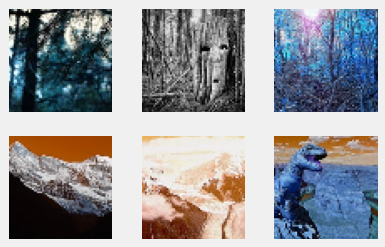

In [66]:
# Read Database 
def read_db(path):
    with open(path, 'rb') as handle:
      images  = pickle.load(handle)
      classes = pickle.load(handle)
    return images, classes

# Read Train set
images_train, classes_train = read_db('/content/drive/My Drive/WLD_AI/train/forest_glacier_train.pkl')

# Read Test Set
images_test, classes_test = read_db('/content/drive/My Drive/WLD_AI/test/forest_glacier_test.pkl')

# Show some of the images
for ii in range(6):
    plt.subplot(2, 3, ii + 1)
    rand_im = np.random.randint(0, len(images_test))
    im = images_test[rand_im]
    plt.imshow(im)
    plt.xticks([])
    plt.yticks([])




<font color='blue'>**Todo**</font>: Engineer you features

Most dominante color in forest pictures is green, meanwhile the most dominant color in the glacier pictures is the white color.
glacier pictures tend to have much brighter color schemes therefore the pixels have high values (usually above 100) in all the RGB meanwhile the forest is much darker therfore it has lower RGB values.
additional features that we can infer from the pictures are: the glaciers having more curves than the forests and most forest pictures having visible trees in them. 

<font color='blue'>**Todo**</font>: Visualize feature space with a scatter plot

Use a <font color='green'>green</font> color for forest embedding and a <font color='gray'>gray</font> color for glacier embedding

In [111]:
def find_dominant(img):
 count=0
 for i in range(64):
   for j in range(64):
      maximum=max(img[i][j][0],img[i][j][1],img[i][j][2])
      if maximum==img[i][j][1]: count=count+1
 return count

def find_darkness(img):
 count=0
 for i in range(64):
  for j in range(64):
      if img[i][j][0]>100 and img[i][j][1]>100 and img[i][j][2]>100: count=count+1
 return count

# initialize the arrays
dom_forest=[0 for element in range(500)]
dark_forest=[0 for element in range(500)]
dom_glacier=[0 for element in range(500)]
dark_glacier=[0 for element in range(500)]

# iterate over 500 forest pictures and count number of pixels where green is the most dominant component in the the RGB
# and also count the amount of pixels that are consiedered "dark"
for i in range(500): 
  dom_forest[i]=find_dominant(images_train[i])
  dark_forest[i]=find_darkness(images_train[i])

# iterate over 500 galcier pictures and count number of pixels where green is the most dominant component in the the RGB
# and also count the amount of pixels that are consiedered "dark"
for i in range(2000,2500):
  dom_glacier[i-2000]=find_dominant(images_train[i])
  dark_glacier[i-2000]=find_darkness(images_train[i])



      

In [112]:
print(dark_forest)
print(dom_forest)
print(dark_glacier)
print(dom_glacier)

[66, 972, 641, 732, 380, 1150, 144, 413, 624, 1167, 288, 247, 674, 607, 1271, 217, 1251, 458, 2884, 34, 753, 65, 285, 1502, 1795, 2934, 1421, 5, 2132, 466, 218, 2392, 209, 250, 1838, 2564, 84, 361, 379, 919, 311, 433, 24, 1425, 140, 539, 1463, 462, 363, 907, 2448, 70, 202, 167, 1145, 309, 2481, 2047, 319, 397, 333, 421, 810, 385, 1220, 1696, 244, 1507, 1864, 1551, 46, 748, 966, 1304, 738, 489, 276, 1698, 1252, 1388, 277, 1897, 848, 285, 957, 1123, 372, 44, 386, 106, 298, 480, 407, 521, 1850, 1902, 1192, 938, 503, 753, 118, 118, 284, 1268, 1113, 10, 870, 342, 1202, 24, 2065, 424, 892, 1692, 5, 296, 30, 1110, 80, 251, 404, 18, 592, 624, 644, 2169, 384, 281, 536, 884, 361, 381, 536, 1193, 56, 943, 304, 689, 887, 1531, 1226, 629, 845, 667, 1462, 128, 1743, 213, 1324, 1871, 1103, 750, 338, 1988, 960, 801, 516, 2611, 1555, 563, 908, 771, 475, 1019, 654, 131, 325, 1579, 643, 1594, 16, 1899, 358, 394, 22, 555, 190, 1334, 1094, 427, 592, 1113, 219, 231, 1157, 0, 683, 1463, 859, 343, 187, 563, 3

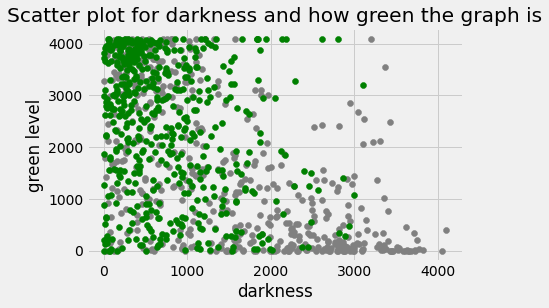

In [113]:
plt.scatter(dark_glacier,dom_glacier,color='gray')
plt.scatter(dark_forest,dom_forest,color='green')
plt.title('Scatter plot for darkness and how green the graph is')
plt.xlabel('darkness')
plt.ylabel('green level')
plt.show()

In [101]:
classification = ['forest','glacier']
for index in range(len(classes_train)):
    #print('the image class is:',classification[classes_train[index]])
    pass

print(images_train[2500],classes_train[2500])

[[[ 59  59  23]
  [ 40  41   1]
  [ 44  46   3]
  ...
  [ 49  46  17]
  [ 59  56  31]
  [ 72  69  42]]

 [[ 40  42   1]
  [ 45  48   2]
  [ 41  45   0]
  ...
  [ 48  48  14]
  [ 35  34   0]
  [ 64  64  27]]

 [[ 45  45   2]
  [ 48  51   3]
  [ 46  50   1]
  ...
  [ 51  52  16]
  [ 49  50  12]
  [ 49  50  10]]

 ...

 [[ 28  24  22]
  [ 51  46  44]
  [ 52  49  46]
  ...
  [  5   3  16]
  [  5   0  14]
  [  9   1  18]]

 [[ 39  32  39]
  [130 124 129]
  [ 35  33  35]
  ...
  [  1   0  18]
  [  4   0  19]
  [ 11   5  24]]

 [[  9   3  21]
  [ 10   6  22]
  [  8   8  21]
  ...
  [ 13  13  31]
  [  5   4  25]
  [  7   2  24]]] 1


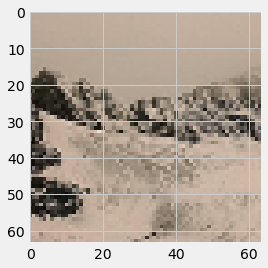

In [89]:
img=plt.imshow(images_test[800])


In [7]:
#change all the numbers in arrays to numbers between 0 and 1
for i in range(len(classes_test)):
   images_test[i] = images_test[i] / 255

for i in range(len(classes_train)):
   images_train[i] = images_train[i] / 255

In [8]:
print(images_test[1])
print(images_train[1])

[[[0.89803922 0.78431373 0.63529412]
  [0.88235294 0.72156863 0.58039216]
  [0.44313725 0.43137255 0.34901961]
  ...
  [0.24705882 0.3254902  0.25490196]
  [0.27058824 0.3372549  0.2745098 ]
  [0.18823529 0.25490196 0.2       ]]

 [[0.66666667 0.58431373 0.38039216]
  [0.6627451  0.5254902  0.39215686]
  [0.74117647 0.61960784 0.49411765]
  ...
  [0.04705882 0.1254902  0.06666667]
  [0.24705882 0.3372549  0.28235294]
  [0.16078431 0.2        0.16078431]]

 [[0.97254902 0.91372549 0.7372549 ]
  [0.7254902  0.55294118 0.39215686]
  [0.45098039 0.3372549  0.18431373]
  ...
  [0.13333333 0.22352941 0.17254902]
  [0.06666667 0.13333333 0.09019608]
  [0.0745098  0.10980392 0.08627451]]

 ...

 [[0.65490196 0.90588235 0.88235294]
  [0.74117647 0.92156863 0.89803922]
  [0.81960784 0.87843137 0.90588235]
  ...
  [0.4627451  0.43921569 0.4627451 ]
  [0.4        0.38823529 0.41960784]
  [0.36470588 0.37647059 0.4       ]]

 [[0.6627451  0.9254902  0.89411765]
  [0.6745098  0.9254902  0.87843137]


In [51]:
model = Sequential()

model.add( Conv2D(32,(3,3), activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add( Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add( Conv2D(64,(3,3), activation='relu'))
model.add(Flatten())   
model.add(Dense(64,activation='relu'))       
model.add(Dropout(0.5))
model.add(Dense(2))       


In [52]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),optimizer='adam',metrics=['accuracy'])

In [53]:
hist= model.fit(np.array(images_train), np.array(classes_train), epochs=10) #train the model

Epoch 1/10
147/147 [==============================] - 31s 204ms/step - loss: 9.5734 - accuracy: 0.8430
Epoch 2/10
147/147 [==============================] - 30s 201ms/step - loss: 0.3220 - accuracy: 0.9139
Epoch 3/10
147/147 [==============================] - 30s 202ms/step - loss: 0.1558 - accuracy: 0.9573
Epoch 4/10
147/147 [==============================] - 30s 204ms/step - loss: 0.2104 - accuracy: 0.9540
Epoch 5/10
147/147 [==============================] - 30s 204ms/step - loss: 0.1587 - accuracy: 0.9652
Epoch 6/10
147/147 [==============================] - 30s 204ms/step - loss: 0.1251 - accuracy: 0.9709
Epoch 7/10
147/147 [==============================] - 30s 202ms/step - loss: 0.1040 - accuracy: 0.9718
Epoch 8/10
147/147 [==============================] - 30s 204ms/step - loss: 0.0950 - accuracy: 0.9706
Epoch 9/10
147/147 [==============================] - 30s 204ms/step - loss: 0.1255 - accuracy: 0.9661
Epoch 10/10
147/147 [==============================] - 30s 203ms/step - l

In [54]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)               

In [56]:
test_loss,test_acc=model.evaluate(np.array(images_test), np.array(classes_test),verbose=2) #test the model
print(test_acc)

33/33 - 2s - loss: 0.0788 - accuracy: 0.9737
0.9737098217010498


Model explaination and why was it built this way:
I used a convolutional neural network in this model in order to detect unique features for each pictures of the two types. 
The network is composed of three convoultion layers each one is separeted from the other by a  Maxpooling layer. The MaxPooling layers are added in order to reduce the dimensionality.
 The starting input for the layer is (as we have discovered before) a 64x64x3 numpy array layer (we don't need to explicitly give the other layers the input shape because it figures it out from the previous layer) and the activation layer that we used is the "relu" function which overcomes the vanishing gradient problem allowing our model to learn faster.
the first convpultion layer has 32 filters with a sample size of 3x3 while the other two have the same sample but 64 filters. The MaxPooling layer has a 2x2 sample size with a stride of 2.


Now after this part of the network we have information about what features exist so now we need to pass to a dense classfier which will extract the features that we found and then check if these features exist in each pictures thus classfying it to one of the two classes.
In order to do that we apply a flatten layer first of all to transform the inputfrom the previous layer to a dimensional array and then pass it through a dense netwrok with 64 neurons that connects all these neourons to it with an activation function of relu again.
before finally getting the output we pass the output of the previous layer through a Dropout layer to prevent our soultion from overfitting and then pass it to our output dense netwprk layer which has two neourons accordingly since we have 2 classes of course.
